# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
cdf = pd.read_csv("./Datasets/covid19_Confirmed_dataset.csv")
cdf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [4]:
cdf.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [7]:
df = cdf.drop(columns=['Lat','Long','Province/State'], axis = 1, inplace = True)

In [10]:
cdf.duplicated().sum()

1

### Task 2.3: Aggregating the rows by the country

In [14]:
cdfa=cdf.groupby('Country/Region').sum();

In [15]:
cdfa.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

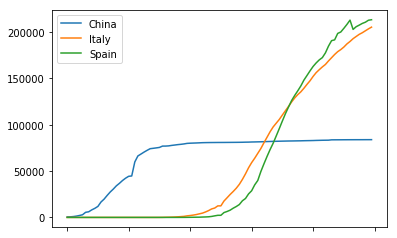

In [19]:
cdfa.loc['China'].plot()
cdfa.loc['Italy'].plot()
cdfa.loc['Spain'].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

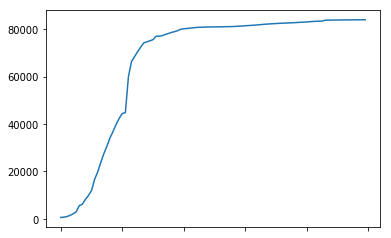

In [23]:
cdfa.loc['China'].plot()


### task 3.1: caculating the first derivative of the curve

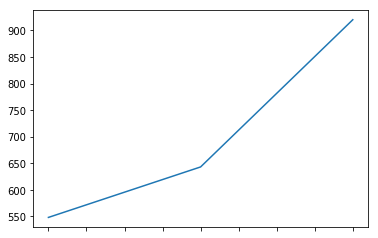

In [24]:
cdfa.loc['China'][:3].plot()

### task 3.2: find maxmimum infection rate for China

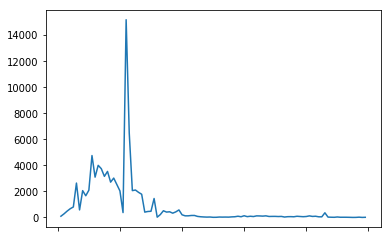

In [25]:
cdfa.loc['China'].diff().plot()

In [28]:
cdfa.loc['China'].diff().idxmax(), cdfa.loc['China'].diff().max()

('2/13/20', 15136.0)

In [31]:
cdfa.loc['Spain'].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [32]:
cdfa['max_rate']=[cdfa.loc[c].diff().max() for c in list(cdfa.index)]

In [33]:
cdfa.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column 

In [34]:
fdf=pd.DataFrame(cdfa['max_rate'])

In [35]:
fdf.head()

,max_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [36]:
df2=pd.read_csv('./Datasets/worldwide_happiness_report.csv')

In [37]:
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [38]:
df2.drop(columns=['Score','Overall rank','Generosity','Perceptions of corruption'], axis = 1, inplace = True)
df2.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [40]:
df2.set_index('Country or region',inplace = True)

### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [41]:
data = df2.join(fdf,how='inner')

#### wolrd happiness report Dataset :

### Task 4.5: correlation matrix 

In [42]:
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_rate
GDP per capita,1.000000,0.759468,0.863062,0.394603,0.250118
Social support,0.759468,1.000000,0.765286,0.456246,0.191958
Healthy life expectancy,0.863062,0.765286,1.000000,0.427892,0.289263
Freedom to make life choices,0.394603,0.456246,0.427892,1.000000,0.078196
max_rate,0.250118,0.191958,0.289263,0.078196,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

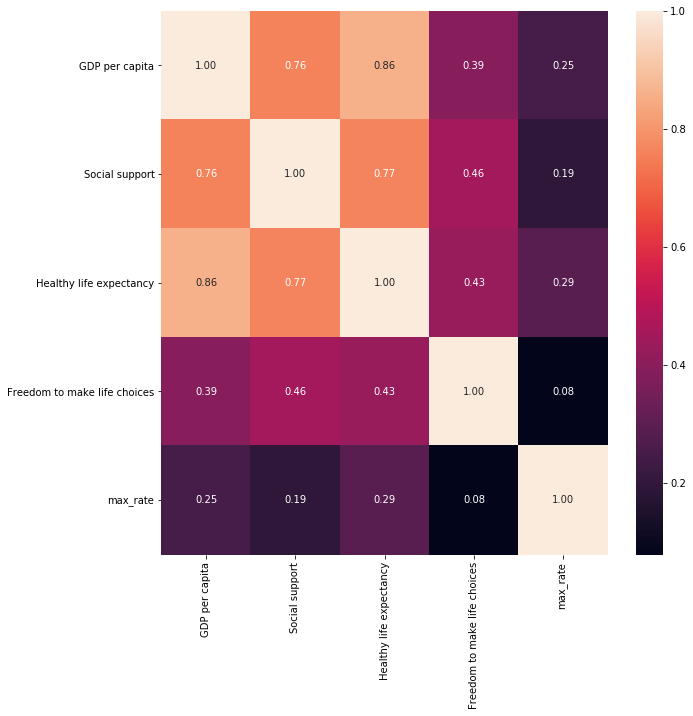

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

### Task 5.1: Plotting GDP vs maximum Infection rate

In [43]:
x=data['GDP per capita']
y=data['max_rate']

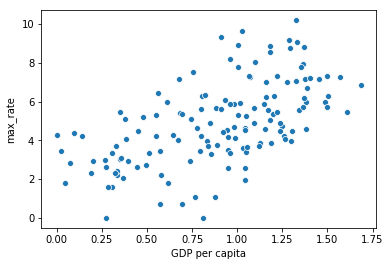

In [45]:
sns.scatterplot(x,np.log(y))

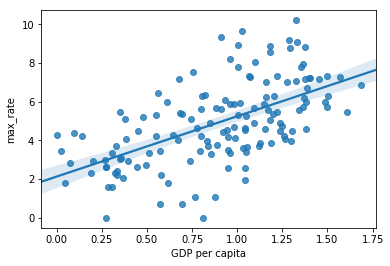

In [46]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

In [49]:
x=data['Social support']
y=data['max_rate']

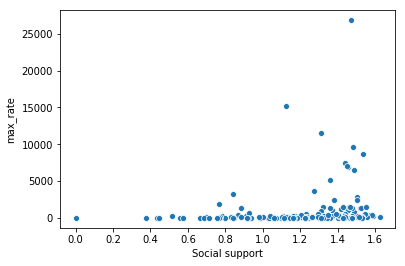

In [50]:
sns.scatterplot(x,y)

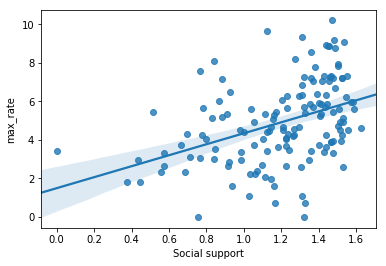

In [51]:
sns.regplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

In [52]:
w=data['Healthy life expectancy']
z=data['max_rate']

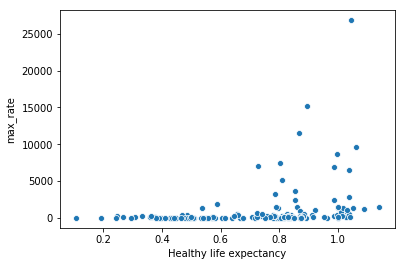

In [53]:
sns.scatterplot(w,z)

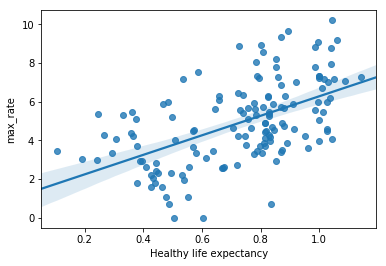

In [55]:
sns.regplot(w,np.log(z))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

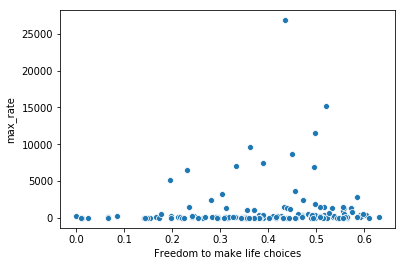

In [68]:
sns.scatterplot(data['Freedom to make life choices'], data['max_rate'])

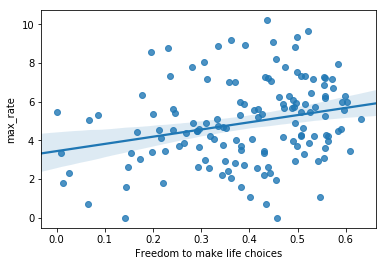

In [70]:
sns.regplot(data['Freedom to make life choices'], np.log(data['max_rate']))